In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [4]:
df=pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   tarih              227520 non-null  object 
 1   ürün               227520 non-null  object 
 2   ürün besin değeri  227520 non-null  int64  
 3   ürün kategorisi    227520 non-null  object 
 4   ürün fiyatı        227520 non-null  float64
 5   ürün üretim yeri   227520 non-null  object 
 6   market             227520 non-null  object 
 7   şehir              227520 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 13.9+ MB


In [5]:
df.tarih=df.tarih.apply(pd.to_datetime)
df.head()
df['ts'] = df[['tarih']].apply(lambda x: x[0].timestamp(), axis=1).astype(int)

In [6]:
df.head()

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ts
0,2016-01-01,kıyma,120,et,33.41,Yurt içi,M,A,1451606400
1,2016-01-01,tavuk,103,et,11.22,Yurt içi,M,A,1451606400
2,2016-01-01,hindi,160,et,11.12,Yurt içi,M,A,1451606400
3,2016-01-01,Bakla-kuru,354,sebze ve bakliyat,7.02,Yurt içi,M,A,1451606400
4,2016-01-01,Bakla-taze,72,sebze ve bakliyat,13.14,Yurt içi,M,A,1451606400


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tarih              227520 non-null  datetime64[ns]
 1   ürün               227520 non-null  object        
 2   ürün besin değeri  227520 non-null  int64         
 3   ürün kategorisi    227520 non-null  object        
 4   ürün fiyatı        227520 non-null  float64       
 5   ürün üretim yeri   227520 non-null  object        
 6   market             227520 non-null  object        
 7   şehir              227520 non-null  object        
 8   ts                 227520 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(5)
memory usage: 14.8+ MB


In [8]:
df.describe()

,ürün besin değeri,ürün fiyatı,ts
count,227520.000000,227520.000000,2.275200e+05
mean,143.113924,16.348622,1.529162e+09
std,133.218871,13.260935,4.553789e+07
min,8.000000,0.730000,1.451606e+09
25%,41.000000,7.330000,1.490335e+09
50%,83.000000,12.600000,1.529107e+09
75%,250.000000,20.900000,1.567944e+09
max,402.000000,141.330000,1.606781e+09


In [9]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
df["ürün"]=le.fit_transform(df["ürün"])
df["ürün üretim yeri"]=le.fit_transform(df["ürün üretim yeri"])
df["market"]=le.fit_transform(df["market"])
df["şehir"]=le.fit_transform(df["şehir"])

In [10]:
df.head(20)

,tarih,ürün,ürün besin değeri,ürün kategorisi,ürün fiyatı,ürün üretim yeri,market,şehir,ts
0,2016-01-01,65,120,et,33.41,1,2,0,1451606400
1,2016-01-01,70,103,et,11.22,1,2,0,1451606400
2,2016-01-01,61,160,et,11.12,1,2,0,1451606400
3,2016-01-01,1,354,sebze ve bakliyat,7.02,1,2,0,1451606400
4,2016-01-01,2,72,sebze ve bakliyat,13.14,1,2,0,1451606400
5,2016-01-01,3,42,sebze ve bakliyat,5.05,1,2,0,1451606400
6,2016-01-01,4,346,sebze ve bakliyat,5.97,1,2,0,1451606400
7,2016-01-01,5,47,sebze ve bakliyat,12.19,1,2,0,1451606400
8,2016-01-01,6,25,sebze ve bakliyat,12.15,1,2,0,1451606400
9,2016-01-01,7,47,sebze ve bakliyat,23.53,1,2,0,1451606400


In [11]:
df.describe()

,ürün,ürün besin değeri,ürün fiyatı,ürün üretim yeri,market,şehir,ts
count,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,227520.000000,2.275200e+05
mean,39.000000,143.113924,16.348622,0.500000,1.000000,3.500000,1.529162e+09
std,22.803559,133.218871,13.260935,0.500001,0.816498,2.291293,4.553789e+07
min,0.000000,8.000000,0.730000,0.000000,0.000000,0.000000,1.451606e+09
25%,19.000000,41.000000,7.330000,0.000000,0.000000,1.750000,1.490335e+09
50%,39.000000,83.000000,12.600000,0.500000,1.000000,3.500000,1.529107e+09
75%,59.000000,250.000000,20.900000,1.000000,2.000000,5.250000,1.567944e+09
max,78.000000,402.000000,141.330000,1.000000,2.000000,7.000000,1.606781e+09


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227520 entries, 0 to 227519
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   tarih              227520 non-null  datetime64[ns]
 1   ürün               227520 non-null  int32         
 2   ürün besin değeri  227520 non-null  int64         
 3   ürün kategorisi    227520 non-null  object        
 4   ürün fiyatı        227520 non-null  float64       
 5   ürün üretim yeri   227520 non-null  int32         
 6   market             227520 non-null  int32         
 7   şehir              227520 non-null  int32         
 8   ts                 227520 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(5), int64(1), object(1)
memory usage: 11.3+ MB


In [13]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [14]:
x=df.loc[:,["ts","ürün","market","şehir","ürün üretim yeri"]]
y=df["ürün fiyatı"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

x_train= min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

In [15]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization,Activation,Flatten

In [16]:
model = Sequential()
model.add(Dense(300,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse", metrics=['accuracy'])

In [17]:
history =model.fit(x_train, 
                y_train,
                validation_data=(x_test, y_test),
                epochs=50)

Epoch 1/50
4977/4977 [==============================] - 7s 1ms/step - loss: 3366625214464.0000 - accuracy: 1.1930e-04 - val_loss: 260.3914 - val_accuracy: 1.7581e-04
Epoch 2/50
 222/4977 [>.............................] - ETA: 5s - loss: 266.3683 - accuracy: 1.4077e-04

KeyboardInterrupt: 

In [18]:
sonuc=model.predict(x_test)

In [19]:
sonuc_df=pd.DataFrame(sonuc)

In [20]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, sonuc)
print(r2)

-0.12058107136562146


writer = pd.ExcelWriter('pandas_10.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc_df.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [1]:
from sklearn.linear_model import LogisticRegression
lin_reg = LogisticRegression()

In [2]:
x=df.loc[:,["ts","ürün","market","şehir","ürün üretim yeri"]]
y=df["ürün fiyatı"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)
hıst=lin_reg.fit(x_train,y_train)
sonuc2=hıst.predict(x_test)

NameError: name 'df' is not defined

asd=sonuc2-y_test
asd

asd.describe()

In [51]:
r2 = r2_score(y_test, sonuc2)
print(r2)

0.23088561363409998


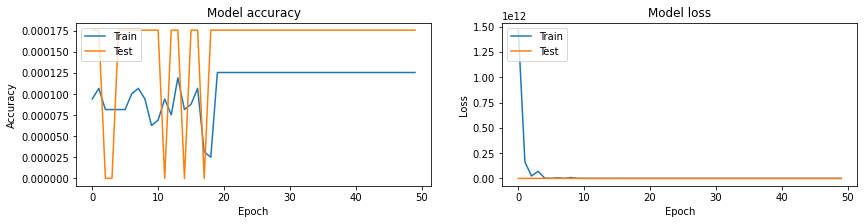

In [22]:
from matplotlib import pyplot as plt
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
df_test=pd.read_csv("testFeatures.csv")
df_test.tarih=df_test.tarih.apply(pd.to_datetime)
df_test["yıl"]=df_test.tarih.dt.year
df_test["ay"]=df_test.tarih.dt.month
df_test["ürün"]=le.fit_transform(df_test["ürün"])
df_test["ürün kategorisi"]=le.fit_transform(df_test["ürün kategorisi"])
df_test["ürün üretim yeri"]=le.fit_transform(df_test["ürün üretim yeri"])
df_test["market"]=le.fit_transform(df_test["market"])
df_test["şehir"]=le.fit_transform(df_test["şehir"])
x_test=df_test.loc[:,["yıl","ay","ürün","ürün besin değeri","ürün kategorisi"]]

In [24]:
df_test=df_test.drop(['id'], axis=1)
sonuc=model.predict(x_test)

In [25]:
sonuc2=pd.DataFrame(sonuc)

In [26]:
writer = pd.ExcelWriter('pandas_9.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
sonuc2.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [27]:
writer.close()

C:\Users\PC\anaconda3\lib\site-packages\xlsxwriter\workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")
